In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/aspect-based-sentiment-analysis-for-financial-news/SEntFiN-v1.1.csv
/kaggle/input/sentiment-analysis-for-financial-news/all-data.csv
/kaggle/input/sentiment-analysis-for-financial-news/FinancialPhraseBank/Sentences_66Agree.txt
/kaggle/input/sentiment-analysis-for-financial-news/FinancialPhraseBank/Sentences_AllAgree.txt
/kaggle/input/sentiment-analysis-for-financial-news/FinancialPhraseBank/README.txt
/kaggle/input/sentiment-analysis-for-financial-news/FinancialPhraseBank/License.txt
/kaggle/input/sentiment-analysis-for-financial-news/FinancialPhraseBank/Sentences_75Agree.txt
/kaggle/input/sentiment-analysis-for-financial-news/FinancialPhraseBank/Sentences_50Agree.txt
/kaggle/input/fintechdata/data.csv


In [3]:
import seaborn as sn 
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from transformers import DistilBertTokenizer
# TFDistilBertForMaskedLM
from transformers import DistilBertModel
import tensorflow as tf
import re
import warnings
warnings.filterwarnings('ignore')

2024-05-19 20:47:19.302135: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-19 20:47:19.302230: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-19 20:47:19.420983: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
# import sample data
data1 =  pd.read_csv('/kaggle/input/aspect-based-sentiment-analysis-for-financial-news/SEntFiN-v1.1.csv')
# import sample data
data2 =  pd.read_csv('/kaggle/input/sentiment-analysis-for-financial-news/all-data.csv', encoding='ISO-8859-1', header=None, names=['sentiment', 'title'])
data1

,S No.,Title,Decisions,Words
0,1,SpiceJet to issue 6.4 crore warrants to promoters,"{""SpiceJet"": ""neutral""}",8
1,2,MMTC Q2 net loss at Rs 10.4 crore,"{""MMTC"": ""neutral""}",8
2,3,"Mid-cap funds can deliver more, stay put: Experts","{""Mid-cap funds"": ""positive""}",8
3,4,Mid caps now turn into market darlings,"{""Mid caps"": ""positive""}",7
4,5,"Market seeing patience, if not conviction: Pra...","{""Market"": ""neutral""}",8
...,...,...,...,...
10748,10749,"Negative on Chambal, Advanta: Mitesh Thacker","{""Chambal"": ""negative"", ""Advanta"": ""negative""}",6
10749,10750,"Small, Mid-cap stocks may emerge outperformers","{""Small"": ""positive"", ""Mid-cap stocks"": ""posit...",6
10750,10751,Rupee slips against US dollar,"{""Rupee"": ""negative"", ""US dollar"": ""neutral""}",5
10751,10752,Rupee weak against US dollar,"{""Rupee"": ""negative"", ""US dollar"": ""neutral""}",5


In [5]:
data2

,sentiment,title
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...
...,...,...
4841,negative,LONDON MarketWatch -- Share prices ended lower...
4842,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...
4843,negative,Operating profit fell to EUR 35.4 mn from EUR ...
4844,negative,Net sales of the Paper segment decreased to EU...


In [6]:
def extract_text(input_string):
    # Define a regular expression pattern to match only alphabetic characters
    pattern = re.compile('[a-zA-Z]+')
    
    # Use findall to extract all matches of the pattern from the input string
    text_only = pattern.findall(input_string)
    
    # Join the extracted text into a single string
    result = ' '.join(text_only)
    
    return result

In [7]:
# # basic process
# data1['sentiment'] = [extract_text(data.split(':')[-1]) for data in data1.Decisions]
# data1.head()

In [8]:
# data1['title'] = data1.Title
# data1 = data1.drop(columns=['Title'])
# data1.head()

In [9]:
data1

,S No.,Title,Decisions,Words
0,1,SpiceJet to issue 6.4 crore warrants to promoters,"{""SpiceJet"": ""neutral""}",8
1,2,MMTC Q2 net loss at Rs 10.4 crore,"{""MMTC"": ""neutral""}",8
2,3,"Mid-cap funds can deliver more, stay put: Experts","{""Mid-cap funds"": ""positive""}",8
3,4,Mid caps now turn into market darlings,"{""Mid caps"": ""positive""}",7
4,5,"Market seeing patience, if not conviction: Pra...","{""Market"": ""neutral""}",8
...,...,...,...,...
10748,10749,"Negative on Chambal, Advanta: Mitesh Thacker","{""Chambal"": ""negative"", ""Advanta"": ""negative""}",6
10749,10750,"Small, Mid-cap stocks may emerge outperformers","{""Small"": ""positive"", ""Mid-cap stocks"": ""posit...",6
10750,10751,Rupee slips against US dollar,"{""Rupee"": ""negative"", ""US dollar"": ""neutral""}",5
10751,10752,Rupee weak against US dollar,"{""Rupee"": ""negative"", ""US dollar"": ""neutral""}",5


In [10]:
# data1  = data1[['title', 'sentiment']]
# data1

In [11]:
# sent_data = pd.concat([data1, data2], axis=0, ignore_index=True)
# sent_data.head()

In [12]:
# sent_data.shape

In [13]:
def word_count(x):
    return len(x.split())

# sent_data['word_count'] = sent_data.title.apply(lambda x:word_count(x))
# sent_data.head()

In [14]:
st = stopwords.words('english')

def remove_stopwords(sent):
    return ' '.join([x for x in sent.split() if x not in st])

def remove_punctuation(sent):    
    return ''.join([x.lower() for x in sent if x not in string.punctuation])

pt = PorterStemmer()

def stem_words(sent):
    return [pt.stem(x.lower()) for x in sent.split()]

def sentence_cleanner(sent): 
    sent = remove_stopwords(sent)
    sent = remove_punctuation(sent)
#     sent = stem_words(sent)
    return sent




In [15]:
# sent_data['clean_tweet'] = sent_data['title'].apply(lambda x:sentence_cleanner(x))
# sent_data

In [16]:
data2.sample(1)

,sentiment,title
1425,neutral,The shipyard hopes the regional government in ...


In [17]:
# data2 only 
final_dataset = data2
final_dataset['clean_tweet'] = final_dataset['title'].apply(lambda x:sentence_cleanner(x))
final_dataset.head()

,sentiment,title,clean_tweet
0,neutral,"According to Gran , the company has no plans t...",according gran company plans move production ...
1,neutral,Technopolis plans to develop in stages an area...,technopolis plans develop stages area less 100...
2,negative,The international electronic industry company ...,the international electronic industry company ...
3,positive,With the new production plant the company woul...,with new production plant company would increa...
4,positive,According to the company 's updated strategy f...,according company s updated strategy years 200...


In [18]:
def joint_text(text): 
    return ''.join(text)

# sent_data['bert_tweet'] = sent_data['clean_tweet'].apply(lambda x: joint_text(x))
# sent_data.head()

In [19]:
# sent_data['sentiment'] = sent_data.sentiment.astype('category')
# sent_data.sentiment.cat.categories
# sent_data['label'] = sent_data.sentiment.cat.codes
# sent_data.head()

In [20]:
# sent_data['word_count'] = sent_data['clean_tweet'].apply(lambda x: len(x.split()))
# sent_data.head()

In [21]:
# sent_data.word_count.max()

In [22]:
# sent_data.shape

In [23]:
# train_data , test_data = train_test_split(sent_data[['bert_tweet', 'label']])
# train_data.head()

In [24]:
# working on dataset 2
final_dataset['lenght'] = final_dataset['clean_tweet'].apply(lambda x: len(x.split()))
final_dataset['sentiment'] = final_dataset.sentiment.astype('category')

In [25]:
final_dataset['label']  = final_dataset['sentiment'].cat.codes
final_dataset.head()

,sentiment,title,clean_tweet,lenght,label
0,neutral,"According to Gran , the company has no plans t...",according gran company plans move production ...,10,1
1,neutral,Technopolis plans to develop in stages an area...,technopolis plans develop stages area less 100...,18,1
2,negative,The international electronic industry company ...,the international electronic industry company ...,22,0
3,positive,With the new production plant the company woul...,with new production plant company would increa...,21,2
4,positive,According to the company 's updated strategy f...,according company s updated strategy years 200...,23,2


<Axes: ylabel='lenght'>

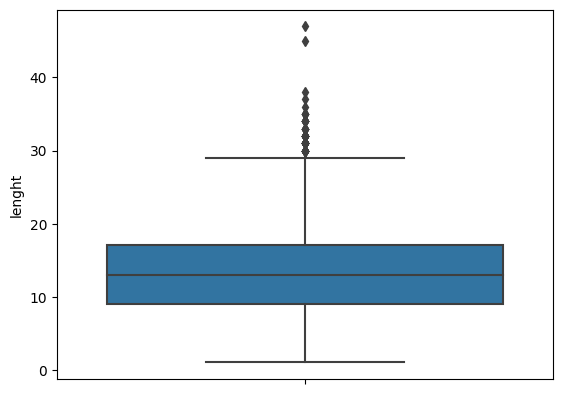

In [26]:
sn.boxplot(data=final_dataset, y='lenght', hue='label')

In [27]:
final_dataset.lenght.max()

47

In [28]:
final_dataset.shape

(4846, 5)

In [29]:
train_data , test_data = train_test_split(final_dataset[['clean_tweet', 'label']])
train_data.head()

,clean_tweet,label
746,the government professional approach assessin...,2
2317,this new partnership agreement represents sign...,2
2513,mr bakman sees also expansion options tallinnh...,1
1548,it part development worldclass magnetite depos...,1
3241,the estonian parliament set vote amendments ex...,1


In [30]:
import tensorflow as tf
from transformers import AutoTokenizer, TFBertModel
# tensorlflow

tokenizer = AutoTokenizer.from_pretrained("bert-large-uncased")
bert =  TFBertModel.from_pretrained("bert-large-uncased")

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [31]:
tokenizer(['this is a sample text', 'this is another text'])

{'input_ids': [[101, 2023, 2003, 1037, 7099, 3793, 102], [101, 2023, 2003, 2178, 3793, 102]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1]]}

In [32]:

x_train = tokenizer(
    text = train_data.clean_tweet.to_list(), 
    add_special_tokens=True, 
    max_length= 50, 
    truncation=True, 
    padding=True, 
    return_tensors='tf', 
    return_token_type_ids=False, 
    return_attention_mask=True, 
    verbose=True
    )


x_test = tokenizer(
    text = test_data.clean_tweet.to_list(), 
    add_special_tokens=True, 
    max_length= 50, 
    truncation=True, 
    padding=True, 
    return_tensors='tf', 
    return_token_type_ids=False, 
    return_attention_mask=True, 
    verbose=True
    )

In [33]:
x_train

{'input_ids': <tf.Tensor: shape=(3634, 50), dtype=int32, numpy=
array([[ 101, 1996, 2231, ...,    0,    0,    0],
       [ 101, 2023, 2047, ...,    0,    0,    0],
       [ 101, 2720, 8670, ...,    0,    0,    0],
       ...,
       [ 101, 7513, 2036, ...,    0,    0,    0],
       [ 101, 2057, 7568, ...,    0,    0,    0],
       [ 101, 1996, 3813, ...,    0,    0,    0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(3634, 50), dtype=int32, numpy=
array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=int32)>}

In [34]:
x_test

{'input_ids': <tf.Tensor: shape=(1212, 50), dtype=int32, numpy=
array([[  101,  2197,  2095, ...,     0,     0,     0],
       [  101, 10556,  6968, ...,     0,     0,     0],
       [  101, 14841, 19658, ...,     0,     0,     0],
       ...,
       [  101,  7156,  3075, ...,     0,     0,     0],
       [  101,  2429,  2449, ...,     0,     0,     0],
       [  101,  2009,  2747, ...,     0,     0,     0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(1212, 50), dtype=int32, numpy=
array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=int32)>}

In [35]:
x_test['input_ids'].shape

TensorShape([1212, 50])

In [36]:
x_train['input_ids'].shape

TensorShape([3634, 50])

In [37]:
y_train = train_data.label.values
y_train

array([2, 2, 1, ..., 2, 2, 1], dtype=int8)

In [38]:
y_test = test_data.label.values
y_test

array([0, 1, 1, ..., 2, 1, 2], dtype=int8)

In [39]:
tf.config.experimental_run_functions_eagerly(True)
tf.config.run_functions_eagerly(True)

In [40]:
max_len = 50
# input layer (supplying input id , and input mask for inputs)
input_id = tf.keras.layers.Input(shape=(max_len,), dtype=tf.int32, name='input_ids')
input_mask = tf.keras.layers.Input(shape=(max_len,), dtype=tf.int32, name='attention_mask')

# input_mask_tensor = input_mask._keras_tensor
# bert layer 
bert_embedding = bert(input_id, attention_mask = input_mask)[1] # 0: last hidden state, 1 is the pool output.. 

# keras layers
# keras layer .. 
# out1 = tf.keras.layers.GlobalMaxPool1D()(bert_embedding) if the hidden state (None, max_len, 1024)
out1 = tf.keras.layers.Dropout(0.1)(bert_embedding)
out2 = tf.keras.layers.Dense(128, activation='relu')(out1)
out3 = tf.keras.layers.Dense(68, activation='relu')(out2)
out4 = tf.keras.layers.Dense(32, activation='relu')(out2)
final_output = tf.keras.layers.Dense(3, activation='sigmoid')(out4)

bert_model = tf.keras.Model(inputs=[input_id, input_mask] , outputs=[final_output])
bert_model.layers[2].trainable=True

In [41]:
bert_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 50)]                 0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 50)]                 0         []                            
 )                                                                                                
                                                                                                  
 tf_bert_model (TFBertModel  TFBaseModelOutputWithPooli   3351418   ['input_ids[0][0]',           
 )                           ngAndCrossAttentions(last_   88         'attention_mask[0][0]']      
                             hidden_state=(None, 50, 10                                       

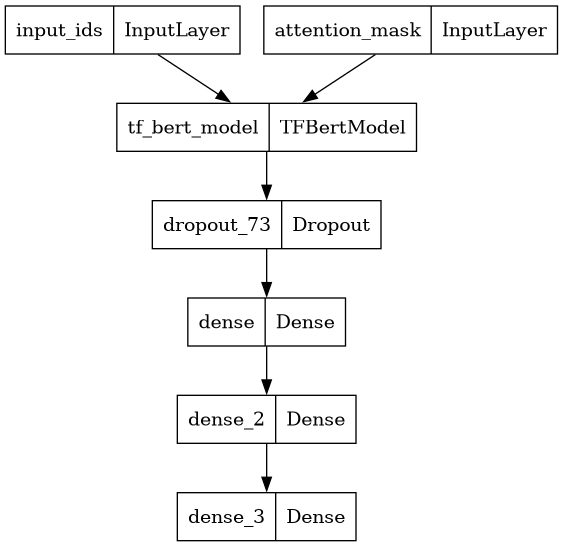

In [42]:
tf.keras.utils.plot_model(bert_model)

In [43]:
import keras
from keras import layers


lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=5e-06,
    decay_steps=1000,
    decay_rate=0.01)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

# opt = keras.optimizers.Adam(learning_rate=0.01)
# bert_model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer)

In [44]:
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.losses import SparseCategoricalCrossentropy
# from tensorflow import keras
import tensorflow as tf
import keras 
# optimizer = tf.keras.optimizers.Adam(
#     learning_rate=5e-06,
#     epsilon=1e-08,
#     decay=0.01,
#     clipnorm=1.0
# )

loss = tf.losses.SparseCategoricalCrossentropy()

bert_model.compile(
    optimizer=optimizer,  # Use the optimizer instance
    loss=loss,
    metrics=['accuracy']
)


In [45]:
from tensorflow.keras.utils import to_categorical
tf.config.experimental_run_functions_eagerly(True)
tf.config.run_functions_eagerly(True)

In [46]:
bert_model.fit(
        x={'input_ids':x_train['input_ids'] , 'attention_mask':x_train['attention_mask']},
        y= y_train,
        validation_data=( {'input_ids':x_test['input_ids'] , 'attention_mask':x_test['attention_mask']},
        y_test ), epochs=10
    )

Epoch 1/10
114/114 [==============================] - 251s 2s/step - loss: 0.9644 - accuracy: 0.5446 - val_loss: 0.8557 - val_accuracy: 0.5899
Epoch 2/10
114/114 [==============================] - 244s 2s/step - loss: 0.7992 - accuracy: 0.6524 - val_loss: 0.7065 - val_accuracy: 0.7046
Epoch 3/10
114/114 [==============================] - 244s 2s/step - loss: 0.6841 - accuracy: 0.7179 - val_loss: 0.6392 - val_accuracy: 0.7360
Epoch 4/10
114/114 [==============================] - 244s 2s/step - loss: 0.6310 - accuracy: 0.7353 - val_loss: 0.6114 - val_accuracy: 0.7426
Epoch 5/10
114/114 [==============================] - 246s 2s/step - loss: 0.5940 - accuracy: 0.7598 - val_loss: 0.5971 - val_accuracy: 0.7500
Epoch 6/10
114/114 [==============================] - 246s 2s/step - loss: 0.5725 - accuracy: 0.7675 - val_loss: 0.5940 - val_accuracy: 0.7492
Epoch 7/10
114/114 [==============================] - 246s 2s/step - loss: 0.5762 - accuracy: 0.7647 - val_loss: 0.5877 - val_accuracy: 0.7508

In [53]:
history = bert_model.history.history
history

{'loss': [0.9644438624382019,
  0.7992439270019531,
  0.6840898394584656,
  0.6310047507286072,
  0.5939808487892151,
  0.572468101978302,
  0.5761925578117371,
  0.564971387386322,
  0.558466374874115,
  0.5573426485061646],
 'accuracy': [0.5445789694786072,
  0.6524490714073181,
  0.7179416418075562,
  0.7352779507637024,
  0.7597688436508179,
  0.7674738764762878,
  0.7647220492362976,
  0.7638965249061584,
  0.7710511684417725,
  0.7762795686721802],
 'val_loss': [0.8556829690933228,
  0.7065484523773193,
  0.6391684412956238,
  0.6113828420639038,
  0.5970777273178101,
  0.5940257906913757,
  0.5877074003219604,
  0.5858895778656006,
  0.5850158929824829,
  0.5844879746437073],
 'val_accuracy': [0.5899339914321899,
  0.7046204805374146,
  0.735973596572876,
  0.7425742745399475,
  0.75,
  0.7491748929023743,
  0.7508251070976257,
  0.7516501545906067,
  0.7508251070976257,
  0.7533003091812134]}

In [48]:
sn.set()

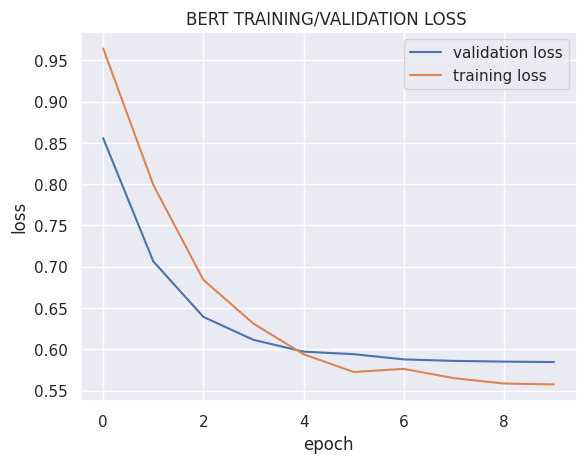

In [54]:
plt.title('BERT TRAINING/VALIDATION LOSS ')
sn.lineplot(history['val_loss'], label='validation loss')
sn.lineplot(history['loss'], label='training loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

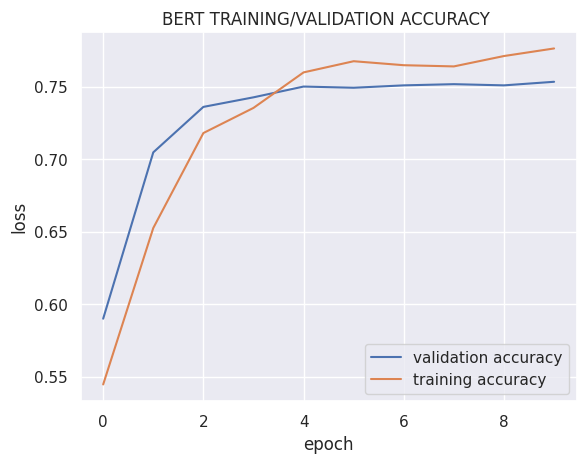

In [55]:
plt.title('BERT TRAINING/VALIDATION ACCURACY ')
sn.lineplot(history['val_accuracy'], label='validation accuracy')
sn.lineplot(history['accuracy'], label='training accuracy')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [51]:
pd.DataFrame(history).to_csv('bert_history.csv', index=False)

In [62]:
x_test

{'input_ids': <tf.Tensor: shape=(1212, 50), dtype=int32, numpy=
array([[  101,  2197,  2095, ...,     0,     0,     0],
       [  101, 10556,  6968, ...,     0,     0,     0],
       [  101, 14841, 19658, ...,     0,     0,     0],
       ...,
       [  101,  7156,  3075, ...,     0,     0,     0],
       [  101,  2429,  2449, ...,     0,     0,     0],
       [  101,  2009,  2747, ...,     0,     0,     0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(1212, 50), dtype=int32, numpy=
array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=int32)>}

In [63]:
predictions = bert_model.predict({'input_ids':x_test['input_ids'], 'attention_mask':x_test['attention_mask']})
predictions

38/38 [==============================] - 15s 389ms/step


array([[0.7510984 , 0.37131515, 0.2713237 ],
       [0.1641988 , 0.87175155, 0.4887335 ],
       [0.13838279, 0.77958953, 0.6255556 ],
       ...,
       [0.22568001, 0.8307919 , 0.4712501 ],
       [0.29866424, 0.8856638 , 0.299264  ],
       [0.26039445, 0.82442796, 0.41616657]], dtype=float32)

[0, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 0, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2]
              precision    recall  f1-score   support

    negative       0.61      0.52      0.56       147
     neutral       0.78      0.88      0.82       703
    positive       0.75      0.61      0.67       362

    accuracy                           0.75      1212
   macro avg       0.71      0.67      0.69      1212
weighted avg       0.75      0.75      0.75      1212



<Axes: >

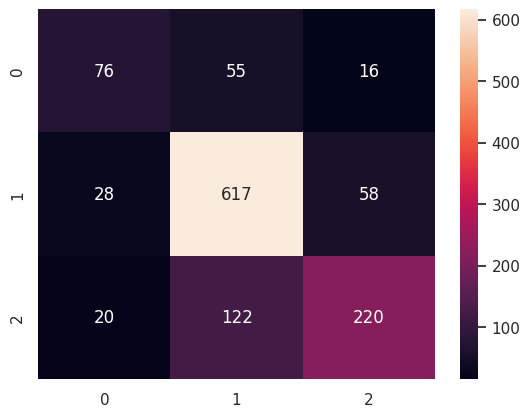

In [66]:
from sklearn.metrics import classification_report, confusion_matrix
# performance evaluation metrics
bert_prediction = [np.argmax(pre) for pre in  predictions]
print(bert_prediction[:30])

# classification report and confusion matrix 
bert_class_report =  classification_report(y_test, bert_prediction, target_names=['negative', 'neutral', 'positive'])
bert_matrix_report =  confusion_matrix(y_test, bert_prediction)

print(bert_class_report)
sn.heatmap(bert_matrix_report, fmt='d', annot=True)